# p 181

In [ ]:
#p.188 Graphviz

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩, 학습과 테스트 데이터셋 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

# 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import export_graphviz

In [5]:
# export_gexport_graphviz() 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, 'tree.dot', # 학습완료모델(트리), 저장할 파일명
                class_names=iris_data.target_names, # 결정값 이름
                feature_names=iris_data.feature_names, # 입력값 이름
                filled=True)

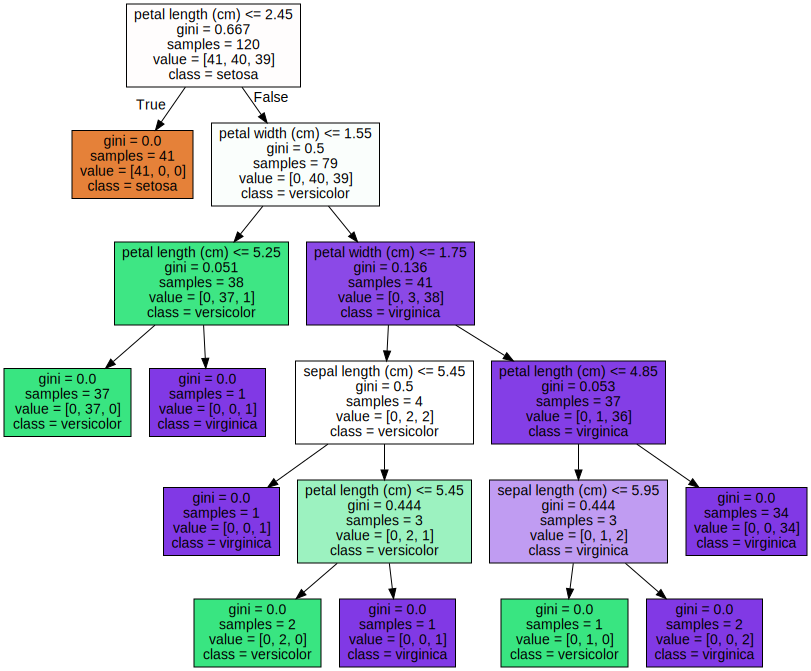

In [6]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어 주피터 노트북상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [7]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3) # 3번 분기 가능
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 'tree.dot', # 학습완료모델(트리), 저장할 파일명
                class_names=iris_data.target_names, # 결정값 이름
                feature_names=iris_data.feature_names, # 입력값 이름
                filled=True)

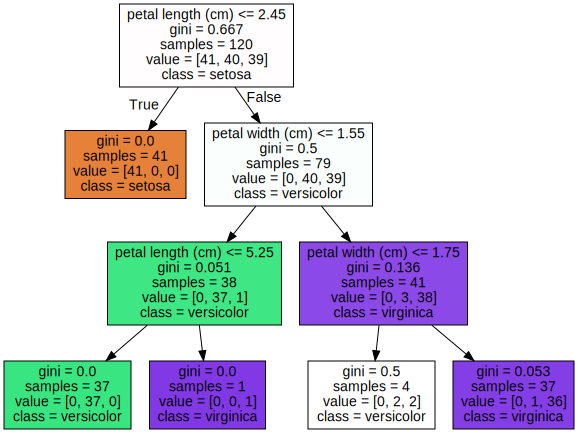

In [11]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [22]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_split=3) #최소 데이터값이 3개 이상일 때 분기할 수 있다.
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 'tree.dot', # 학습완료모델(트리), 저장할 파일명
                class_names=iris_data.target_names, # 결정값 이름
                feature_names=iris_data.feature_names, # 입력값 이름
                filled=True)

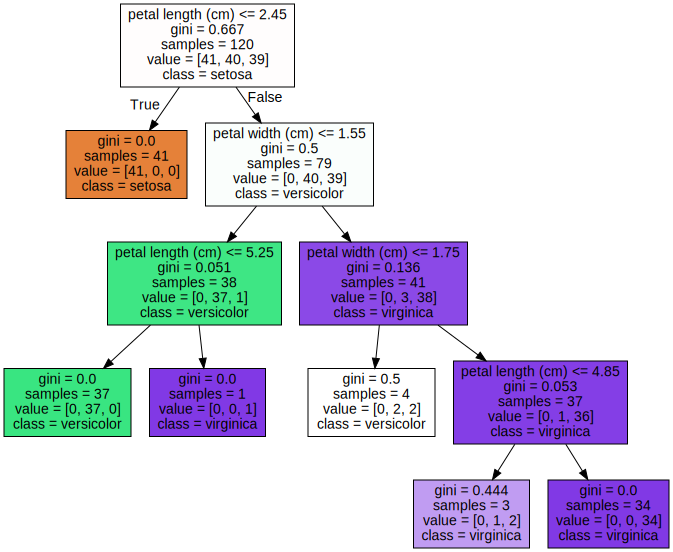

In [21]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [25]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=3) # 리프노드에 최소 데이터값이 3개 이상이어야한다.
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, 'tree.dot', # 학습완료모델(트리), 저장할 파일명
                class_names=iris_data.target_names, # 결정값 이름
                feature_names=iris_data.feature_names, # 입력값 이름
                filled=True)

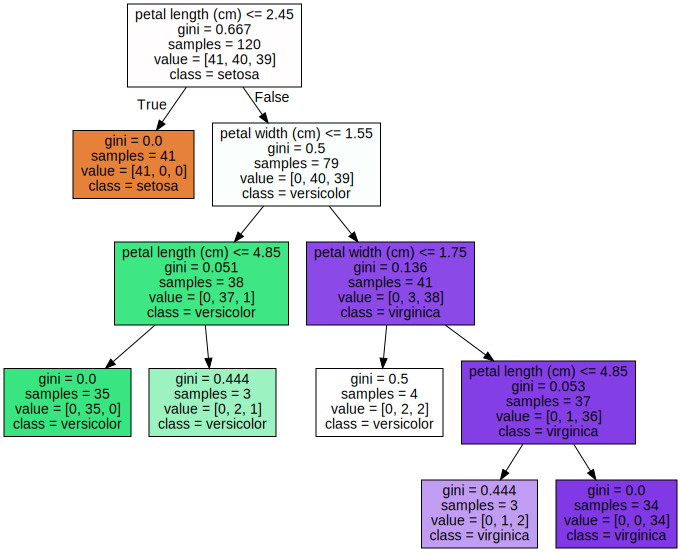

In [26]:
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances :[0.    0.    0.554 0.446]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.554
petal width (cm) : 0.446


<AxesSubplot:>

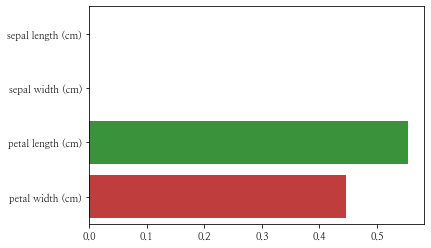

In [32]:
import seaborn as sns

# feature importance 추출, 해당 모델의 분기 조건의 중요도를 알 수 있다. p.197
print(f'Feature importances :{np.round(dt_clf.feature_importances_, 3)}')

# feature별 importance 매필
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f'{name} : {value:.3f}')
    
# feature importance를 column 별 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

# 결정 트리 과적합(Overfitting)

In [37]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib

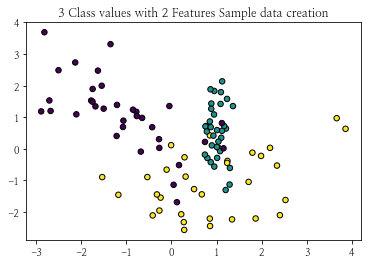

In [57]:
plt.title('3 Class values with 2 Features Sample data creation')
matplotlib.rcParams['axes.unicode_minus']=False

# 2차원 시각화를 위해 피처 2개(X), 클래스(y) 3가지 유형의 분류 샘플 데이터 생성
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_classes=3,
                           n_clusters_per_class=1,
                           random_state=0)

# 그래프 형태로, 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색 표시
plt.scatter(X[:,0], X[:,1], marker='o', c=y, s=30, edgecolors='k')

In [83]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow',
                           # cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

In [84]:
dt_clf = DecisionTreeClassifier(random_state=156).fit(X, y)

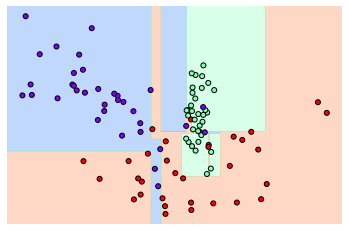

In [85]:
visualize_boundary(dt_clf, X, y)

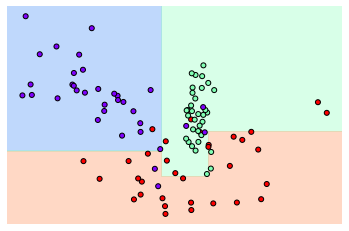

In [86]:
dt_clf = DecisionTreeClassifier(random_state=156, min_samples_leaf=6).fit(X, y)
visualize_boundary(dt_clf, X, y)

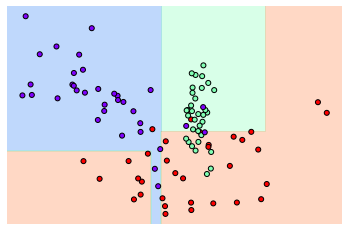

In [89]:
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3).fit(X, y)
visualize_boundary(dt_clf, X, y)

# 결정 트리 실습 - 사용자 행동 인식 데이터셋 p.200